---
# <font color="#CA3532">Práctica 3 de Neurocomputación</font>
### Curso 2021-2022
### Escuela Politécnica Superior – Universidad Autónoma de Madrid

---

Fechas de entrega:
- Grupo 2462: lunes 16 de mayo de 2022
- Grupo 2461: martes 17 de mayo de 2022

---

Última actualización: 31-03-2022

---

*Sesión 1*:

- Esta práctica está centrada en [Keras](https://keras.io/).

- Keras es una biblioteca de redes neuronales de código abierto, diseñada para la experimentación con redes neuronales profundas. Keras es modular, extensible y fácil de usar.

- Keras puede usar distintos motores. Aquí se usará con TensorFlow.



In [160]:
### Incluid vuestros nombres, pareja y grupo aquí:
estudiantes = [{'nombre': 'Zhijie Qian', 'pareja': 'P05', 'grupo': '2461'},
               {'nombre': 'Santo Saenz Ferrero', 'pareja': 'P05', 'grupo': '2461'}]


### <font color="#CA3532">Importación de bibliotecas</font>

TensorFlow 2.0 incluye oficialmente Keras.

In [161]:
# Importaciones

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

import keras as k
from keras.models import Sequential
from keras.layers import Dense

### <font color="#CA3532">Datos del problema</font>

El problema consiste en predecir si va a haber una erupción solar (*solar flares*) en ciertas regiones solares en función de las características de la región solar. El conjunto datos y la caracterización de sus atributos puede encontrarse en https://www.openml.org/d/40702. El siguiente fragmento de código permite cargar estos datos.

In [162]:
dataset_url = 'https://www.openml.org/data/get_csv/4965303/flare.arff' 

dataset = np.genfromtxt(dataset_url, delimiter=',', skip_header=1)

### -------------------------------------------------------------------------------
### Dividid los ejemplos en atributos y clases. Guardad el número de atributos.
### -------------------------------------------------------------------------------

x = dataset[:,:-1]
x_size = x.shape[1]
y = dataset[:,-1]

In [163]:
# Resultados de la división y el número de atributos

print('Ejemplo 0:', x[0], y[1])
print('Atributos:', x_size)
print('Clases:', np.unique(y))
print('Recuento de clases:', y.tolist().count(0), y.tolist().count(1))
print('Examplos:', len(x))

Ejemplo 0: [5. 4. 3. 1. 3. 1. 1. 2. 1. 1.] 0.0
Atributos: 10
Clases: [0. 1.]
Recuento de clases: 884 182
Examplos: 1066


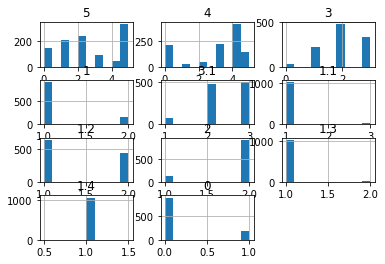

In [164]:
# create pairwise scatter plots of numeric input variables
from pandas import read_csv
from pandas import DataFrame
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

# load the csv file as a data frame
df = read_csv(dataset_url, header=1)

# histograms of all variables 
df.hist()
pyplot.show()

In [165]:
print(df.head(20))

    5  4  3  1  3.1  1.1  1.2  2  1.3  1.4  0
0   1  3  1  1    2    1    1  2    1    1  0
1   2  3  2  1    3    1    1  2    1    1  1
2   5  4  3  2    2    1    2  2    1    1  0
3   1  4  2  1    3    1    1  2    1    1  0
4   1  4  2  1    2    1    2  2    1    1  0
5   2  2  1  1    3    1    2  2    1    1  0
6   2  3  2  1    3    1    1  2    1    1  0
7   0  5  2  1    2    1    1  2    1    1  0
8   2  1  2  1    2    1    2  2    1    1  0
9   3  0  1  2    2    1    2  2    1    1  0
10  2  0  1  2    3    1    2  2    1    1  0
11  1  4  2  1    3    1    1  2    1    1  0
12  1  3  2  1    2    1    2  2    1    1  0
13  5  4  3  1    2    1    1  2    1    1  0
14  2  4  2  1    3    1    1  2    1    1  1
15  2  0  1  1    3    1    2  2    1    1  0
16  3  4  1  1    2    1    2  2    1    1  0
17  1  3  2  1    3    1    1  2    1    1  0
18  5  4  3  1    1    1    2  2    1    1  0
19  5  3  3  1    1    1    1  2    1    1  1


Los datos se encuentran en diferentes intervalos de valores por lo que el modelo puede tender a ponderar más los datos con rangos de valores mayores, por ello se ha decidico escalar los datos de la forma que se nos proporciona.

In [166]:
# Normalizad los datos (si es necesario)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [167]:
print(x.shape)

(1066, 10)


### <font color="#CA3532">Definición del modelo</font>

- Cada capa del modelo lleva definidas una serie de propiedades (tamaño, función de activación, conectividad, etc.). 

- Usaremos el modelo secuencial que Keras para crear una red neuronal multicapa con propagación hacia adelante.



In [168]:
# Definid el modelo con Keras

nn = Sequential()

### -------------------------------------------------------------------------------
### Añadir la capas completamente conectadas que consideréis al modelo
### -------------------------------------------------------------------------------
nn.add(Dense(1066, activation="sigmoid"))
nn.add(Dense(6, activation="sigmoid"))
nn.add(Dense(6, activation='sigmoid'))
nn.add(Dense(4, activation='sigmoid'))
nn.add(Dense(2, activation='sigmoid'))
nn.add(Dense(2, activation='sigmoid'))
nn.add(Dense(3, activation='sigmoid'))
nn.add(Dense(3, activation='sigmoid'))
nn.add(Dense(1, activation="sigmoid"))

Se ha decidido añadir una capa por cada característica, dentro de cada capa una neurona por cada alternativa

### <font color="#CA3532">Compilación de la red neuronal</font>

- La compilación es la operación que contruye la red neuronal.

- La compilación incluye aspectos que se tendrán en cuenta en el entrenamiento de la red neuronal.

- En la secciones de abajo encontraréis enlaces a la documentación oficial donde podréis encontrar información sobre las distintas estrategias de cada uno de los aspectos.

- También es posible definid vuestras propias funciones.

#### <font color="#CA3532">Optimizador</font>

El optimizador es la estrategia para calcular las correcciones de los pesos.

https://keras.io/api/optimizers/


#### <font color="#CA3532"> Función de error (*Loss function*)</font>

La función de error calcula la cantidad que el modelo debe minimizar durante el entrenamiento.

https://keras.io/api/losses/

#### <font color="#CA3532">Métricas</font>

Una métrica es una función que juzga la actuación del modelo. Son funciones similares a las funciones de error pero, a diferencia de estas, no se aplican durante el entrenamiento, sino sobre los resultados. Aprende al menos el significado y las diferencias de las métricas *accuracy*, *precision*, *recall* y *AUC*. También pueden usarse las funciones de error como metricas.

https://keras.io/api/metrics/

In [169]:
# Compilación

### -------------------------------------------------------------------------------
### Compilad vuestro modelo de red neuronal
### -------------------------------------------------------------------------------

metrics = [
            #keras.metrics.TruePositives(name='tp'),
            #keras.metrics.FalsePositives(name='fp'),
            #keras.metrics.TrueNegatives(name='tn'),
            #keras.metrics.FalseNegatives(name='fn'),
            keras.metrics.BinaryAccuracy(name='ACC'),
            keras.metrics.Precision(name='Prec'),
            keras.metrics.Recall(name='Rec'),
            keras.metrics.AUC(name='AUC'),
            #keras.metrics.AUC(name='PRC', curve='PR'),
          ]

nn.compile(optimizer='SGD', loss="mse", metrics=metrics)
# nn.compile(optimizer='Adam', loss="binary_crossentropy", metrics=metrics)

### <font color="#CA3532">Conjuntos de entrenamiento y validación</font>

Usaremos el 80 % de los datos para entrenamiento y el 20 % para validación. Usaremos también la técnica de muestreo estratificado (también están permitidas otras formas de validación). Averigua qué es y para qué sirve.

In [170]:
# Contrucción de los conjuntos de entrenamiento y validación

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x, y, stratify=y, test_size=0.2) 

A partir de la técnica de muestreo estratificado los datos se dividen por una característica común, en este caso por la clase objetivo, por ello los datos se obtienen en train y validación de forma equilibrada teniendo en ambos proporcion especificada por test_size para cada clase objetivo

### <font color="#CA3532">Visualización de resultados</font>

Para la visualización de los resultados utilizaremos gráficas con la evolución de la función de pérdida y las métricas en cada época del entrenamiento, tanto para los datos de entrenamiento como para los de validación.

También obtendremos la matriz de confusión y alguna métricas sobre cada clase del problema. Observaremos especialmente la medida macro-F1.

In [171]:
from sklearn.metrics import classification_report, confusion_matrix

def show_metrics(history):
    for metric in history.history.keys():
        if not metric.startswith('val_'):
            plt.plot(history.history[metric], label=metric)
            plt.plot(history.history[f'val_{metric}'], label=f'val_{metric}')
            plt.title(metric)
            plt.ylabel('')
            plt.xlabel('Epoch')
            plt.legend(loc="upper left")
            plt.show()

### <font color="#CA3532">Entrenamiento de la red neuronal y evaluación</font>

El método "fit" entrena una red neuronal con los datos que se le proporcionen.

https://keras.io/api/models/model_training_apis/#fit-method

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_180 (Dense)           (None, 1066)              11726     
                                                                 
 dense_181 (Dense)           (None, 6)                 6402      
                                                                 
 dense_182 (Dense)           (None, 6)                 42        
                                                                 
 dense_183 (Dense)           (None, 4)                 28        
                                                                 
 dense_184 (Dense)           (None, 2)                 10        
                                                                 
 dense_185 (Dense)           (None, 2)                 6         
                                                                 
 dense_186 (Dense)           (None, 3)               

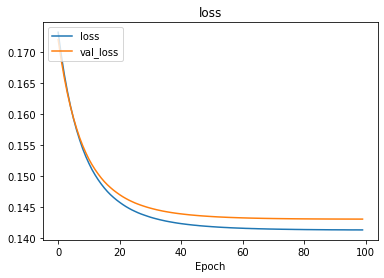

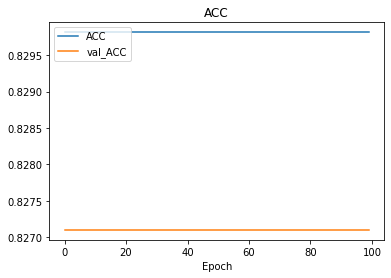

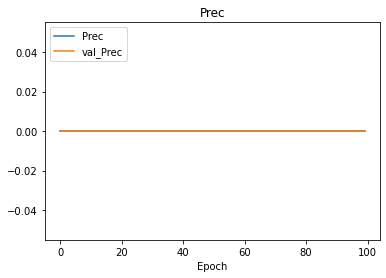

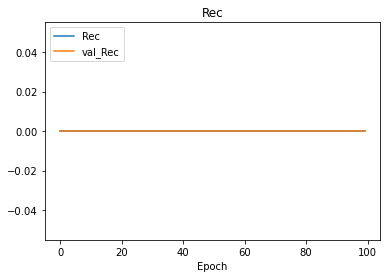

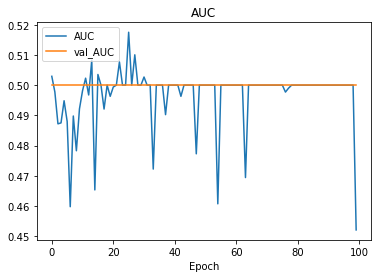

[[177   0]
 [ 37   0]]
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91       177
         1.0       0.00      0.00      0.00        37

    accuracy                           0.83       214
   macro avg       0.41      0.50      0.45       214
weighted avg       0.68      0.83      0.75       214



In [172]:
# Entrenamiento

epochs = 100

history = nn.fit(x_train, y_train, epochs=epochs, verbose=0, validation_data=(x_val, y_val))

# Predicciones del conjunto de evaluación

y_pred = nn.predict(x_val)
y_pred = y_pred > 0.5

# Detalles de la red neuronal

nn.summary()
print('\n\n')

# Visualización de las métricas 

show_metrics(history)

# Matriz de confusión

print(confusion_matrix(y_val, y_pred))

# Observa la medida macro-f1 del siguiente informe

print(classification_report(y_val, y_pred, zero_division=0))


### <font color="#CA3532">Entrenamiento de la red neuronal y evaluación</font>
Como podrás haber observado en problema no está balanceado (o está bastante desequilibrado), porque el número de ejemplos de cada clase es muy diferente.

Existen varias técnicas para abortar este tipo de problemas. Una de ellas consiste seleccionar un subconjunto de datos equilibrados en el que las dos clases esten representadas en la misma proporción.


In [173]:
from sklearn.model_selection import StratifiedKFold, KFold
skf = StratifiedKFold(n_splits=2)
skf.get_n_splits(x, y)
for train_index, test_index in skf.split(x, y):
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [174]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
for train_index, test_index in sss.split(x, y):
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [175]:
### -------------------------------------------------------------------------------
### Assigna diferentes pesos a cada una de las clases
### -------------------------------------------------------------------------------

x_train_balanceado = ...
y_train_banceado = ...

x_val_balanceado = ...
y_val_banceado = ...

Vuelve a entrenar con este nuevo conjunto de datos y observa como varía el resultado de la matriz de confusión. Si es posible, intenta conseguir un modelo mejor y describe los resultados alcanzados.

In [176]:
history = nn.fit(x_train_balanceado, y_train_balanceado, epochs=epochs, verbose=0, class_weight=class_weights, validation_data=(x_val_balanceado, y_val_balanceado))

# Detalles de la red neuronal

nn.summary()
print('\n\n')

y_pred = nn.predict(x_val_balanceado)
y_pred = y_pred > 0.5

print(classification_report(y_val_balanceado, y_pred, zero_division=0))

print(confusion_matrix(y_val_balanceado, y_pred))

NameError: name 'y_train_balanceado' is not defined

Otra técnica consiste en asignar un peso a cada clase para que lo tenga en cuenta en algoritmo de entrenamiento.
Aprende lo que hace el parámetro ```class_weight``` de ```fit``` (https://keras.io/api/models/model_training_apis/#fit-method) y explícalo.

In [ ]:
### -------------------------------------------------------------------------------
### Assigna diferentes pesos a cada una de las clases
### -------------------------------------------------------------------------------

from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}

print(class_weights)

Vuelve a entrenar considerando distintos pesos y observa como varía el resultado de la matriz de confusión. Si es posible, intenta conseguir un modelo mejor y describe los resultados alcanzados.

In [ ]:
history = nn.fit(x_train, y_train, epochs=epochs, verbose=0, class_weight=class_weights, validation_data=(x_val, y_val))

# Detalles de la red neuronal

nn.summary()
print('\n\n')

y_pred = nn.predict(x_val)
y_pred = y_pred > 0.5

print(classification_report(y_val, y_pred, zero_division=0))

print(confusion_matrix(y_val, y_pred))

### <font color="#CA3532">Optimización del diseño de la red neuronal</font>

- Cambiad la arquitectura de la red neuronal introduciendo más capas y neuronas para conseguir mejores resultados:
 - Añadid más capas o diferente tipo de capas.
 - Cambiad las funciones de activación.
 - Cambiad la función de error o el optimizador.

- Utilizad ```tuner``` para la búsqueda de estos hiperparámetros (https://keras.io/keras_tuner/).


In [ ]:
!pip install -U keras-tuner
import keras_tuner
from kerastuner.tuners import RandomSearch

C:\Users\santo\AppData\Local\Temp/ipykernel_10544/3035793469.py:3: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [ ]:
### -------------------------------------------------------
### Define tu hipermodelo
### -------------------------------------------------------

def build_model(hp):
    nn = Sequential()
    nn.add(Dense(hp.Int('units', ...), ...)
    nn.add(Dense(1, activation="sigmoid"))
    nn.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])), loss=..., metrics=metrics)
    return nn

### -------------------------------------------------------
### Pon en marcha la búsqueda de hiperparámetros, elije el 
### objetivo más adecuado.
### -------------------------------------------------------

tuner = RandomSearch(build_model, objective='val_ACC', max_trials=50, executions_per_trial=3) 

tuner.search_space_summary()

tuner.search(x_train, y_train, epochs=epochs, class_weight=class_weights, validation_data=(x_val, y_val), verbose=0)

tuner.results_summary()

best_nn = tuner.get_best_models(num_models=1)

y_pred = best_nn[0].predict(x_val)
y_pred = y_pred > 0.5

print(confusion_matrix(y_val, y_pred))

print(classification_report(y_val, y_pred, zero_division=0))

### <font color="#CA3532">Diseño final de la red neuronal</font>
Define ahora tu modelo final y muestra los resultados de su evaluación.

In [ ]:
### ---------------------------------------------------------------------------
### Modelo final y evaluación
### ---------------------------------------------------------------------------

nn_final = Sequential()
nn_final.add(...)

nn_final.compile(..., metrics=metrics)

history = nn_final.fit(x_train, y_train, epochs=epochs, class_weight=class_weights, validation_data=(x_val, y_val), verbose=0)

y_pred = nn_final.predict(x_val)
y_pred = y_pred > 0.5

print(confusion_matrix(y_val, y_pred))

print(classification_report(y_val, y_pred, zero_division=0))